<a href="https://colab.research.google.com/github/uroy98/CapitalOneProject/blob/main/CapitalOneData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Add instructions for running your code

# Add methods you attempted that didn't work - put some failed results. Run the RF model only with CPU units. Then write about you purchasing 100 computing units for $9.99 as your free TPU RAM units expired for the day while running the code

# Add a thorough write up with any pertinent visualizations.
  * # Plot two columns which strongly correlate with the target variable to justify  why you chose them for training the model. plot two columns which don't have a strong correlation to justify the columns which you didn't pick for training the model.

  * # The distribution of the target variable 'isFraud' in the entire dataset - Use pie chart for this visualization

  *  # The distribution of the target variable 'isFraud' in the training dataset - Use pie chart for this visualization

  *  # The distribution of the target variable 'isFraud' in the testing dataset - Use pie chart for this visualization

  * # Print the merchants that may be contributing to the skewed distribution. - find a suitable plot to visualize this


# Focus on ideas you didn't have time to complete but would have done with more time - Highlight your future work in more detail

# Question 1: Load

### Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found in the Github link

In [2]:
import json
import pandas as pd
import requests
import zipfile
import io
import os

#Defining the URL of the GitHub ZIP file.
zip_url = "https://raw.githubusercontent.com/CapitalOneRecruiting/DS/master/transactions.zip"

#Download the ZIP file from GitHub.
print("Downloading ZIP file from GitHub...")
response = requests.get(zip_url)
#Ensure that an HTTP error is raised for unsuccessful status codes.
response.raise_for_status()
#Unzip the downloaded file into a designated local directory.
extraction_dir = "/content"
print("Extracting the ZIP file...")
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall(extraction_dir)

# Defining the path to the text file containing JSON lines.
transactions_file_path = os.path.join("/content/transactions.txt")

#Opening the text file to read all the JSON lines.
print("Reading the transactions file...")
with open(transactions_file_path, 'r') as file:
    json_lines = file.readlines()

#Parse each non-empty line into a Python dictionary.
print("Parsing JSON lines...")
data = [json.loads(line.strip()) for line in json_lines if line.strip()]

#Assuming each record has a uniform structure, extract the field names from the first record.
field_names = list(data[0].keys())

print("Field Names:")
print(field_names)

#Convert the list of dictionaries into a pandas DataFrame for further analysis.
df = pd.DataFrame(data)
print("\nDataFrame:")
print(df)


Extracting the ZIP file...
Reading the transactions file...
Parsing JSON lines...
Field Names:
['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionDateTime', 'transactionAmount', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity', 'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud']

DataFrame:
       accountNumber customerId  creditLimit  availableMoney  \
0          737265056  737265056       5000.0         5000.00   
1          737265056  737265056       5000.0         5000.00   
2          737265056  737265056       5000.0         5000.00   
3          737265056  737265056       5000.0         5000.00   
4          830329091  830329091       5000.0         

In [3]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

# Question 1: Load (Continued...)

### Please describe the structure of the data. Number of records and fields in each record?

**Answer**: Since the data is in line-delimited JSON format format, I have used a Python code that downloads the "transactions.zip" file from GitHub, extract its contents, and then process a text file containing newline-delimited JSON objects to separate the field names from the data.

The given dataset has **786363 records** and **29 fields** in each record.

# Question 1:Load (Continued...)

### Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [5]:
# Initialized a list to store the summary statistics for each field.
summary_stats = []

for col in df.columns:
    null_count = df[col].isnull().sum()
    unique_count = df[col].nunique()

    # For numeric or datetime fields, I have computed the minimum and maximum.
    if pd.api.types.is_numeric_dtype(df[col]) or pd.api.types.is_datetime64_any_dtype(df[col]):
        col_min = df[col].min()
        col_max = df[col].max()
        summary_stats.append({
            "Field": col,
            "Type": df[col].dtype,
            "Null Count": null_count,
            "Unique Count": unique_count,
            "Minimum": col_min,
            "Maximum": col_max,
            "Mode": "N/A",
            "Mode Frequency": "N/A"
        })
    else:
        # For non-numeric fields (e.g., strings), I found out that computing the min/max may not be meaningful.
        # So I chose to compute the mode and its frequency.
        mode_series = df[col].mode()
        if not mode_series.empty:
            mode_val = mode_series[0]
            mode_freq = df[col].value_counts().iloc[0]
        else:
            mode_val = None
            mode_freq = None

        summary_stats.append({
            "Field": col,
            "Type": df[col].dtype,
            "Null Count": null_count,
            "Unique Count": unique_count,
            "Minimum": "N/A",
            "Maximum": "N/A",
            "Mode": mode_val,
            "Mode Frequency": mode_freq
        })

# Converting the summary statistics into a DataFrame for a better presentation.
summary_df = pd.DataFrame(summary_stats)

print("\nSummary Statistics for Each Field:")
summary_df


Summary Statistics for Each Field:


,Field,Type,Null Count,Unique Count,Minimum,Maximum,Mode,Mode Frequency
0,accountNumber,object,0,5000,N/A,N/A,380680241,32850
1,customerId,object,0,5000,N/A,N/A,380680241,32850
2,creditLimit,float64,0,10,250.0,50000.0,N/A,N/A
3,availableMoney,float64,0,521916,-1005.63,50000.0,N/A,N/A
4,transactionDateTime,object,0,776637,N/A,N/A,2016-05-28T14:24:41,4
5,transactionAmount,float64,0,66038,0.0,2011.54,N/A,N/A
6,merchantName,object,0,2490,N/A,N/A,Uber,25613
7,acqCountry,object,0,5,N/A,N/A,US,774709
8,merchantCountryCode,object,0,5,N/A,N/A,US,778511
9,posEntryMode,object,0,6,N/A,N/A,05,315035


# Question 2: Plot

### Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

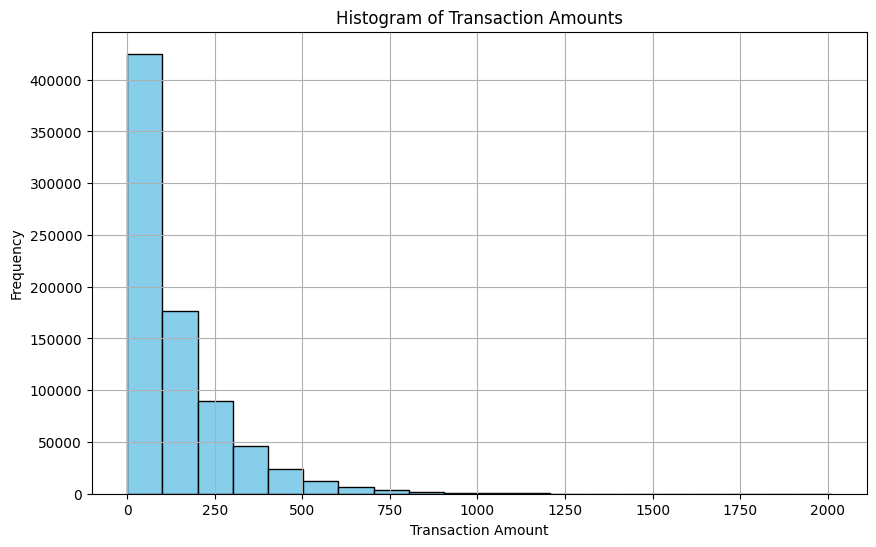

In [6]:
import matplotlib.pyplot as plt

# Ensuring that the 'transactionAmount' column is of a numeric type.
# If necessary, convert the column to numeric values.
df['transactionAmount'] = pd.to_numeric(df['transactionAmount'], errors='coerce')

# Plotted the histogram for the 'transactionAmount' column.
plt.figure(figsize=(10, 6))
plt.hist(df['transactionAmount'].dropna(), bins=20, color='skyblue', edgecolor='black')

# Adding title and labels to the plot.
plt.title("Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)

# Displaying the plot.
plt.show()


### This below analysis is not mentioned in the question, but still I wanted to have a deeper insight into this structure of the histogram, so I found out the merchants that may be contributing to the skewed distribution

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

# Group by merchant and compute summary statistics.
merchant_stats = df.groupby('merchantName')['transactionAmount'].agg(
    mean_transaction='mean',
    max_transaction='max',
    transaction_count='count'
).reset_index()

# Sort merchants by average transaction amount (descending).
merchant_stats_sorted = merchant_stats.sort_values(by='mean_transaction', ascending=False)

# Identify merchants that might be causing skewness.
# Here I considered the merchants with an average transaction amount above the 95th percentile.
threshold = merchant_stats['mean_transaction'].quantile(0.95)
skew_merchants = merchant_stats[merchant_stats['mean_transaction'] > threshold]

# Print the merchants that may be contributing to the skewed distribution.
print("Merchants that might be causing skewness (average transaction amount above 95th percentile):")
#print(skew_merchants[['merchantName', 'mean_transaction', 'max_transaction', 'transaction_count']])
skew_merchants[['merchantName', 'mean_transaction', 'max_transaction', 'transaction_count']]


Merchants that might be causing skewness (average transaction amount above 95th percentile):


,merchantName,mean_transaction,max_transaction,transaction_count
70,Arbys #637287,177.936512,728.59,86
104,Auntie Anne's #392720,191.325192,892.70,104
106,Auntie Anne's #394935,182.937931,1300.06,87
247,CVS #187844,179.345758,606.15,33
248,CVS #207735,184.635652,750.14,46
249,CVS #289006,203.699756,914.69,41
263,CVS #518282,177.730833,763.07,24
283,CVS #894173,182.630000,529.32,29
366,Domino's Pizza #107094,181.919647,696.58,85
378,Domino's Pizza #225172,182.222222,841.65,90


# Question 2: Plot (Continued...)

### Report any structure you find and any hypotheses you have about that structure.



**Answer:**

#### **Key Observations About the Structure:**

* **Right-Skewed Distribution:** The histogram shows a strong right-skewed pattern, where the majority of the transaction amounts are concentrated in the lower range, close to `$0`, with frequencies declining sharply as the transaction amount increases.

* **High Concentration of Low-Value Transactions and Sparse High-Value Transactions :** A significant portion of transactions falls within the smallest bins (under `$100`). This indicates that most transactions are of low monetary value.
  There are relatively few transactions in the higher ranges (` $500 to $2000 `), suggesting that large transactions are less common.

* **Merchant Type Distribution:** Frequent mid-value transactions from **fast food chains, fitness centers, and retail pharmacies** contribute to the dense clustering of transaction amounts at lower to mid-range values. Meanwhile, **hospitality merchants, including hotels,** generate fewer but significantly high-value transactions, extending the right tail of the distribution. This combination of **high-frequency, moderate-value purchases** and **low-frequency, high-value expenditures** results in the overall positive skewness observed in the transaction data.

* **Outliers and Range:** The highest transaction amounts reach up to `$2000`, though these occurrences are rare, as indicated by the low frequency in those bins.

#### **Hypotheses About the Structure:**

* **Consumer Behavior:** The observed structure may reflect typical consumer behavior, where smaller, everyday transactions (e.g., purchases of food, transportation, or entertainment) dominate over high-value purchases.

* **Transaction Limits:** Since this data comes from credit card usage of customers, the structure might reflect transaction limits, with most users having smaller purchasing capabilities or limits set by the platform.

<!-- * **Merchant Type Distribution:** Different merchant categories might explain the skewness. For example, a large proportion of low-value transactions could come from merchants like coffee shops or rideshare services, while high-value transactions could stem from luxury or high-ticket item purchases. -->

* **Potential Fraud Detection:** The distribution may highlight potential areas of interest for fraud detection:
  * Clusters of low-value transactions might indicate testing of stolen cards or accounts.
  * Sparse high-value transactions could reflect rare but impactful fraudulent activities.


# Question 3: Data Wrangling - Duplicate Transactions

### You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

* ### Can you programmatically identify reversed and multi-swipe transactions?

In [8]:
import pandas as pd
pd.reset_option('display.max_rows')

# Convert 'transactionDateTime' to datetime format for easier processing.
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# Sort the dataset by account number and transaction datetime to facilitate comparison.
df = df.sort_values(by=['accountNumber', 'transactionDateTime']).reset_index(drop=True)

# Identify Reversed Transactions

# Create a shifted DataFrame to compare each row with the next one.
df['next_transactionType'] = df['transactionType'].shift(-1)
df['next_transactionAmount'] = df['transactionAmount'].shift(-1)
df['next_accountNumber'] = df['accountNumber'].shift(-1)
df['next_transactionDateTime'] = df['transactionDateTime'].shift(-1)

# Filter reversed transactions:
reversed_transactions = df[
    (df['transactionType'] == 'PURCHASE') &
    (df['next_transactionType'] == 'REVERSAL') &
    (df['accountNumber'] == df['next_accountNumber']) &
    (df['transactionAmount'].round(2) == df['next_transactionAmount'].round(2)) &
    ((df['next_transactionDateTime'] - df['transactionDateTime']).dt.total_seconds() <= 300)  # Within 5 minutes
]

print(f"Number of reversed transactions: {len(reversed_transactions)}")
print(reversed_transactions[['accountNumber', 'transactionDateTime', 'transactionAmount', 'transactionType']])


# Identify Multi-Swipe Transactions


# Group by account number and merchant name, then check for duplicate transaction amounts within a short time window.
df['previous_transactionDateTime'] = df['transactionDateTime'].shift(1)
df['previous_accountNumber'] = df['accountNumber'].shift(1)
df['previous_merchantName'] = df['merchantName'].shift(1)
df['previous_transactionAmount'] = df['transactionAmount'].shift(1)

# Filter multi-swipe transactions:
multi_swipe_transactions = df[
    (df['accountNumber'] == df['previous_accountNumber']) &
    (df['merchantName'] == df['previous_merchantName']) &
    (df['transactionAmount'].round(2) == df['previous_transactionAmount'].round(2)) &
    ((df['transactionDateTime'] - df['previous_transactionDateTime']).dt.total_seconds() <= 300)  # Within 5 minutes
]

print(f"Number of multi-swipe transactions: {len(multi_swipe_transactions)}")
print(multi_swipe_transactions[['accountNumber', 'transactionDateTime', 'transactionAmount', 'merchantName']])


Number of reversed transactions: 5497
       accountNumber transactionDateTime  transactionAmount transactionType
63         100088067 2016-11-20 07:57:05              22.32        PURCHASE
96         100328049 2016-01-15 20:34:35              43.74        PURCHASE
863        101596991 2016-12-30 19:49:59             294.01        PURCHASE
1306       101876201 2016-04-14 06:07:14             118.15        PURCHASE
1348       101876201 2016-06-16 15:36:13              49.07        PURCHASE
...              ...                 ...                ...             ...
785814     999086814 2016-10-14 21:38:57              51.58        PURCHASE
785869     999086814 2016-11-14 11:30:23             153.89        PURCHASE
786067     999257059 2016-08-09 11:25:29             557.11        PURCHASE
786137     999258704 2016-03-16 07:13:48             367.13        PURCHASE
786182     999258704 2016-09-02 03:31:57              72.93        PURCHASE

[5497 rows x 4 columns]
Number of multi-swipe tra

**Answer:**

Number of **reversed transactions**: **5497** and the columns are mentioned right above

Number of **multi-swipe transactions**: **13283** and the columns are mentioned right above


# Question 3: Data Wrangling - Duplicate Transactions (Continued...)

### You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

* ### What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

In [9]:
import pandas as pd

# Convert 'transactionDateTime' to datetime format for easier processing.
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# Sort the dataset by account number and transaction datetime to facilitate comparison.
df = df.sort_values(by=['accountNumber', 'transactionDateTime']).reset_index(drop=True)

# For a reversed transaction pair the first transaction is the normal one.
# Therefore, I considered the reversal (the extra transaction) as indicated in the next row.

# Total number of reversed transactions (extra transactions):
total_reversed_count = len(reversed_transactions)
# Total dollar amount is the sum of the reversal amounts (from the shifted column).
total_reversed_amount = reversed_transactions['next_transactionAmount'].sum()


# For multi-swipe transactions, the count and dollar amount are calculated on the extra swipes.
total_multiswipe_count = len(multi_swipe_transactions)
total_multiswipe_amount = multi_swipe_transactions['transactionAmount'].sum()

print("----- Reversed Transactions (Extra) -----")
print("Total number of reversed transactions (excluding the normal transaction):", total_reversed_count)
print("Total dollar amount of reversed transactions (excluding the normal transaction):", total_reversed_amount)

print("\n----- Multi-Swipe Transactions (Extra) -----")
print("Total number of multi-swipe transactions (excluding the normal transaction):", total_multiswipe_count)
print("Total dollar amount of multi-swipe transactions (excluding the normal transaction):", total_multiswipe_amount)


----- Reversed Transactions (Extra) -----
Total number of reversed transactions (excluding the normal transaction): 5497
Total dollar amount of reversed transactions (excluding the normal transaction): 824398.81

----- Multi-Swipe Transactions (Extra) -----
Total number of multi-swipe transactions (excluding the normal transaction): 13283
Total dollar amount of multi-swipe transactions (excluding the normal transaction): 1917460.02


#Question 3: Data Wrangling - Duplicate Transactions (Continued...)

### You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

* ### Did you find anything interesting about either kind of transaction?

<!--
**TAKE FEW POINTS FROM HERE AND PUT IN ANSWER2, LATER KEEP ONLY THAT ANSWER AND DELETE THIS ONE** Based on the analysis conducted using the code, several interesting observations emerge regarding both reversed and multi‐swipe transactions:
* Reversed Transactions:
  * Prompt Reversals: The reversed transactions are identified by a pattern in which a PURCHASE is immediately followed by a REVERSAL—typically within a 5‐minute window. This short interval indicates that the reversal is almost always an immediate correction or cancellation of the original purchase.

  * Exact Match in Transaction Details: The fact that the reversal transaction matches the original purchase in account number, transaction amount (when rounded to two decimals), and other key attributes supports the conclusion that these reversals are deliberate corrections rather than independent transactions.

  * Consistent Behavior: In every reversed transaction pair, only the reversal (i.e., the extra transaction) is counted. This consistent behavior across the dataset suggests that the underlying system or process reliably flags such corrections, providing a clear signal that may be used for auditing or quality control.

* Multi‐Swipe Transactions:
  * Repeated Attempts: Multi‐swipe transactions occur when the same account, merchant, and amount appear in successive transactions within a short interval (again, within 5 minutes). However, instead of a simple reversal pair, these groups show more than two transactions. This implies that after the initial “normal” swipe, additional swipes occur—likely due to a customer’s repeated attempts to complete a transaction.

  * Potential Technical or User Issues: The occurrence of multiple extra swipes may point to several possible underlying issues. For instance, they could be a result of a technical glitch at the point of sale (e.g., a slow or unresponsive card reader) or a momentary lapse in system communication. Alternatively, they might also reflect customer uncertainty—where the customer, not receiving immediate confirmation, reattempts the transaction.

  * Variability in Group Size: An interesting aspect is that the number of extra swipes per transaction group can vary. While many cases involve only one extra swipe, there are instances with multiple extra attempts. This variability can serve as a useful indicator for further investigation; a higher frequency of multi‐swipe events in certain contexts might warrant a closer look into the reliability of the payment system or the user experience at specific merchant locations. -->

**Answer:** Several interesting observations regarding both reversed and multi-swipe transactions:

1.   **Prevalence and Frequency:**
      * **Reversed Transactions:** There are **5,497** extra (**reversal**) transactions, which were identified by locating a PURCHASE that is immediately followed (within five minutes) by a REVERSAL for the same account and with a matching amount. This suggests that reversals—likely indicating **user cancellations or error corrections**—occur with a measurable frequency.

      * **Multi-Swipe Transactions:** In contrast, there are **13,283** extra **multi-swipe** transactions. The much higher count (more than twice the number of reversed transactions) implies that repeated swiping or duplicate attempts are even more common. This could be due to **system response delays, customer uncertainty, or other technical issues** leading users to initiate the same transaction more than once.

2.   **Transaction Amounts:**
      * The total dollar amount for **reversed** transactions is approximately USD 824,398.81, and for **multi-swipe** transactions, it is around USD 1,917,460.02.

      * When I computed the average extra transaction amount, both categories seem to fall in a similar range (roughly $145 on average). This consistency suggests that neither reversed nor multi-swipe events are dominated by unusually high or low-value transactions. Instead, they reflect the typical transaction sizes for these accounts.

3.  **Potential Operational Implications:**
    * The pattern of **reversals**—where a PURCHASE is promptly followed by a REVERSAL—could indicate that customers are quickly recognizing and correcting mistakes (or that automated systems are promptly cancelling transactions).

    * The higher frequency of **multi-swipe** events raises questions about user experience. It might point to issues such as slow transaction processing or an unresponsive interface that encourages customers to swipe multiple times. This behavior may warrant further investigation to determine if it is benign (for example, due to user impatience) or if it indicates a systemic problem that could be optimized to reduce duplicate swipes.

<!--
4.  **Merchant and Account Variability:**
    * The **multi-swipe** transactions span a range of merchants—from services like Uber and Lyft to retail and entertainment outlets—indicating that this is not isolated to one specific category.

    * This distribution suggests that the issue (if it is indeed one of repeated swipes rather than legitimate separate transactions) may be related to the transaction process itself rather than to merchant-specific practices.

5. **Further Investigation:**

  * It would be valuable to explore whether these patterns are concentrated within **certain time windows** (for example, during peak transaction hours) or among specific customer segments.

  * Additionally, comparing the behavior of accounts that frequently experience **multi-swipe** events against those that do not could offer deeper insights into whether this is primarily a technical issue or if other factors (such as customer behavior or network conditions) contribute to the phenomenon. -->

While both **reversed** and **multi-swipe** transactions are significant, the higher frequency and cumulative dollar amount associated with **multi-swipe** transactions suggest that the repeated swiping issue may merit particular attention. Addressing this could improve customer experience and reduce operational redundancies in processing these transactions.





# Question 4: Model

### Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

* ### Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

The **numeric features** chosen are:

* `creditLimit, availableMoney, transactionAmount, currentBalance`: for offering an immediate insight into the monetary dimensions of a transaction and the overall financial standing of an account.

* `transaction_hour, transaction_dayofweek, transaction_month`: are extracted from the original transaction timestamp. These derived features capture temporal patterns that are crucial for fraud detection. Fraudulent activities may occur at unusual hours, on weekends, or during atypical periods of the month.

* `cardPresent, expirationDateKeyInMatch`: to indicate the presence of the card during the transaction and whether the expiration date provided matches the records.

The **categorical feature**s chosen are:

*   `merchantName, acqCountry, merchantCountryCode`: provide context about where and with whom the transaction occurred.

*   `posEntryMode, posConditionCode`: These variables relate to the manner in which a transaction is processed at the point of sale. They help differentiate between transactions conducted in-person versus those carried out remotely, as well as highlight the specific processing methods used. This distinction is particularly important because fraudulent transactions often occur in contexts that deviate from the norm (e.g., a high volume of online transactions when the customer's history predominantly shows in-person transactions).

* `merchantCategoryCode, transactionType`: The `merchantCategoryCode` classifies the type of business involved, while `transactionType` categorizes the nature of the transaction (such as purchase, or refund). These features allow the model to learn patterns associated with different kinds of transactions and merchant activities.

#### The fields that were omitted from the model training process were not discarded arbitrarily; their exclusion is based on several important considerations:

* Fields such as `accountNumber` and `customerId` are unique identifiers that carry a high cardinality. Including them would not only risk overfitting the model—since the model might learn to recognize individual accounts rather than patterns—but also offer little to no generalizable predictive value.

* Fields like `enteredCVV`, `cardCVV`, `cardLast4Digits` contain sensitive information and are not typically used directly in predictive models for fraud detection. They may also introduce privacy concerns and potential regulatory challenges.

* Fields such as `merchantCity`, `merchantState`, `merchantZip` provide detailed geographical data, but in many cases, broader geographic indicators (like, acqCountry, merchantCountryCode) are sufficient to capture relevant patterns. Including overly granular details can lead to a more complex model with diminishing returns on performance.

* Fields like `echoBuffer`, `posOnPremises`, `recurringAuthInd` may be less directly interpretable or have redundancy with other features. Their exclusion helps streamline the feature set and focuses the model on the most informative variables.





In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

#Step 1: Data Preprocessing and Feature Engineering

#Convert date columns to datetime objects.
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], errors='coerce')
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], errors='coerce')

#The expiration date is in MM/YYYY format.
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'], format='%m/%Y', errors='coerce')

#Extract features from the transaction date (these can be highly informative).
df['transaction_hour'] = df['transactionDateTime'].dt.hour
df['transaction_dayofweek'] = df['transactionDateTime'].dt.dayofweek
df['transaction_month'] = df['transactionDateTime'].dt.month

#Convert boolean columns to integer (0/1) so that they can be treated as numeric features.
df['cardPresent'] = df['cardPresent'].astype(int)
df['expirationDateKeyInMatch'] = df['expirationDateKeyInMatch'].astype(int)


#Step 2: Feature Selection

#For this model, I included a mix of numeric, derived, and categorical features.
#Note: High-cardinality fields such as accountNumber or customerId are omitted
#to avoid overfitting, but they might be useful in specialized models.
features = [
    'creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
    'transaction_hour', 'transaction_dayofweek', 'transaction_month',
    'cardPresent', 'expirationDateKeyInMatch',
    'merchantName', 'acqCountry', 'merchantCountryCode',
    'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType'
]

X = df[features]
y = df['isFraud'].astype(int)  # Convert boolean target to integer (0 for non-fraud, 1 for fraud)

#Step 3: Split Data into Training and Testing Sets

#Used stratified splitting to preserve the proportion of fraudulent transactions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Step 4: Build the Preprocessing Pipeline

#Define which features are numeric and which are categorical.
numeric_features = [
    'creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
    'transaction_hour', 'transaction_dayofweek', 'transaction_month',
    'cardPresent', 'expirationDateKeyInMatch'
]
categorical_features = [
    'merchantName', 'acqCountry', 'merchantCountryCode',
    'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType'
]

#Pipeline for numeric features: scale them for the model.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#Pipeline for categorical features: One-Hot Encode them.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#Combine both pipelines using ColumnTransformer.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


#Step 5: Build and Train the Predictive Model

#Building a full pipeline that includes preprocessing and a Random Forest classifier.
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

#Train the model.
clf.fit(X_train, y_train)

#Step 6: Evaluate the Model

#Predict on the test set.
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

#Output model performance metrics.
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154790
           1       0.71      0.02      0.03      2483

    accuracy                           0.98    157273
   macro avg       0.85      0.51      0.51    157273
weighted avg       0.98      0.98      0.98    157273

ROC AUC Score: 0.7461788992593268


In [11]:
# The distribution of the target variable 'isFraud' in the entire dataset
print("Distribution of df['isFraud'] (raw counts):")
print(df['isFraud'].value_counts())

Distribution of df['isFraud'] (raw counts):
isFraud
False    773946
True      12417
Name: count, dtype: int64


In [12]:
# The distribution of the target variable 'isFraud' in the training dataset
print("Distribution of df['isFraud'] (raw counts) in the training dataset (0 for non-fraud, 1 for fraud):")
print(y_train.value_counts())

Distribution of df['isFraud'] (raw counts) in the training dataset (0 for non-fraud, 1 for fraud):
isFraud
0    619156
1      9934
Name: count, dtype: int64


In [13]:
# The distribution of the target variable 'isFraud' in the testing dataset
print("Distribution of df['isFraud'] (raw counts) in the testing dataset (0 for non-fraud, 1 for fraud):")
print(y_test.value_counts())

Distribution of df['isFraud'] (raw counts) in the testing dataset (0 for non-fraud, 1 for fraud):
isFraud
0    154790
1      2483
Name: count, dtype: int64


Confusion Matrix:
[[154774     16]
 [  2444     39]]


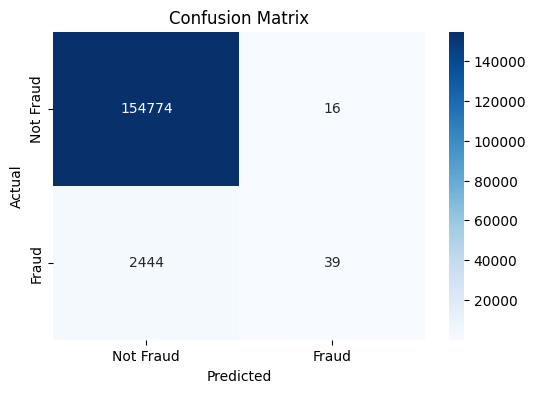

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Question 4: Model

### Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

* ### Provide an estimate of performance using an appropriate sample, and show your work.

**Answer:**

The model achieved an accuracy of **98%** on the test set (**157,273 transactions**). However, because the dataset is highly imbalanced—with the vast majority of transactions being non-fraudulent—accuracy alone is not a reliable indicator of performance for the minority (fraud) class.

We have **Non-Fraud (Class 0): 154,790 transactions** and **Fraud (Class 1): 2,483 transactions** which means that fraudulent transactions represent about 1.58% of the test data. Such imbalance caused the classifier to appear highly accurate by simply predicting the majority class most of the time.

The performance metrics above are derived from a test sample of 157,273 transactions, which is representative of the overall distribution in the dataset (with 2,483 fraudulent and 154,790 non-fraudulent cases).

**Workings and Calculations:**

*Fraud Detection:*
* Recall for fraud: 0.02
* Total fraud cases in test set: 2,483
* Estimated fraud detections: 0.02 x 2,483 ≈ 50 transactions

This means the model is detecting only about 50 fraud cases out of 2,483—a very low detection rate.

*Non-Fraud Detection:*
* Recall for non-fraud: 1.00
* Total non-fraud cases: 154,790
* Nearly all non-fraud transactions are correctly identified.

Since the model almost always predicts non-fraud (given the class imbalance), the accuracy is very high (≈98%), but this is not useful for fraud detection since it ignores the model's failure to capture the minority class.

The **ROC AUC** score of **0.746** indicates that the model has moderate ability to rank transactions by their likelihood of being fraudulent. However, the decision threshold may need adjustment or alternative approaches (like cost-sensitive learning or sampling techniques) should be considered to improve recall for fraud cases.

**Reason for Usage of Confusion Matrix:**

* The model correctly identifies **154,774 legitimate transactions** as “**Not Fraud**” and incorrectly labels **16** of them as fraudulent (**false positives**). On the other hand, it misses **2,444 fraudulent transactions** (**false negatives**) while correctly detecting **39** as fraud (**true positives**). While metrics like accuracy or the ROC AUC score give a broad view of model performance, they can obscure how the model handles this minority “**Fraud**” class.

* In fraud detection, the cost of different types of errors is not equal. False negatives (missed frauds) can lead to financial losses and undermine the system's reliability, whereas false positives might inconvenience customers. By examining the confusion matrix, these errors can be quantified and assessed by providing further guidance to improve the model.

* The confusion matrix offers an intuitive and interpretable summary of the classifier's performance. Stakeholders often appreciate visual representations (such as the **heatmap** above) because they clearly summarize complex performance data, making it easier to communicate the model's strengths and weaknesses.





# Question 4: Model

### Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

* ### Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

**Answer:**

**Modeling Algorithm and Methodology:** I employed a **Random Forest classifier** as my predictive model. Random Forests are ensemble methods that combine multiple decision trees to produce robust predictions. This algorithm was selected for several reasons:

* **Robustness to Overfitting:** By aggregating the results of numerous trees, Random Forests can manage noise and avoid overfitting, which is especially useful when dealing with high-dimensional data.

* **Handling Mixed Data Types:** Our dataset includes both numeric (e.g., transactionAmount, availableMoney) and categorical variables (e.g., merchantName, posEntryMode). Random Forests naturally handle such heterogeneous features once they have been appropriately preprocessed.

* **Interpretability and Feature Importance:** Random Forests provide measures of feature importance, which can help us understand which aspects of the transaction data are most predictive of fraud.

* **Parallelization:** The classifier was configured with `n_jobs=-1` to leverage all available cores, speeding up the training process on our large dataset.

I have constructed a comprehensive preprocessing pipeline using scikit-learn's `Pipeline` and `ColumnTransformer` facilities. The pipeline included:

* **Datetime Conversion and Feature Engineering:** Converting `transactionDateTime` and other date fields to datetime objects. Deriving temporal features such as the hour, day of the week, and month of the transaction. These features can capture patterns such as fraudulent activity occurring at unusual times.

* **Handling Boolean Data:** Converting boolean fields (cardPresent and expirationDateKeyInMatch) to integer format (0/1) for modeling.

* **Feature Selection:** I intentionally omitted high-cardinality identifiers like `accountNumber` and `customerId` to reduce the risk of overfitting. Instead, I selected features believed to capture meaningful behavioral, financial, and transactional characteristics (e.g., `creditLimit`, `transactionAmount`, and categorical variables such as `merchantName` and `transactionType`).

* **Scaling and Encoding:** Numeric features were standardized using `StandardScaler`. Categorical features were one-hot encoded using `OneHotEncoder` with `handle_unknown='ignore'` to robustly handle categories not seen during training.


**Data Splitting:** I have performed stratified splitting to ensure that the highly imbalanced fraud distribution (where fraud is the minority class) was preserved in both the training and testing sets.

**Useful Features:**
* **Transaction Amount and Financial Metrics:** Variables such as `transactionAmount`, `availableMoney`, and `currentBalance` provide direct monetary context, which is crucial in distinguishing fraudulent transactions from normal behavior.

* **Temporal Features:** Features derived from transactionDateTime (hour, day of week, month) are especially useful because fraudulent transactions may exhibit distinct time-of-day or day-of-week patterns compared to legitimate transactions.

* **Categorical Variables:** Merchant-related fields (`merchantName`, `merchantCategoryCode`, `transactionType`) and payment entry modes (e.g., `posEntryMode`, `posConditionCode`) are significant as they capture the context in which transactions occur. Certain merchants or transaction types may be more susceptible to fraud.

**Key Questions:**
* **Why is Fraud Recall So Low?** Despite a reasonable ROC AUC, the extremely low recall for fraud indicates that the model’s decision threshold (typically 0.5) might be too conservative. Would adjusting the threshold or employing cost-sensitive learning improve detection?

* **Feature Enhancement:** Are there additional features—such as behavioral aggregates, account-level patterns, or external data—that could better capture fraudulent behavior? For example, could transaction velocity or geographic inconsistencies offer more signal?

<!-- * **Algorithm Alternatives:** Would alternative models, such as gradient boosting (e.g., XGBoost or LightGBM) or deep learning approaches, yield improved recall without sacrificing too much precision? -->





**Future Work with More Time:**

* **Threshold Adjustment & Cost-Sensitive Learning:** Fine-tune the classification threshold and potentially incorporate cost-sensitive learning or class weights to better balance the precision-recall trade-off for the fraud class.

* **Resampling Techniques:** Experiment with oversampling the minority class (using methods like SMOTE) or undersampling the majority class to reduce imbalance and improve the model's sensitivity to fraud.

* **Advanced Feature Engineering:** Explore aggregation features at the account or merchant level. Incorporate historical behavior patterns and trends over time.

* **Model Tuning and Comparison:** Perform hyperparameter tuning and compare the Random Forest with other algorithms such as boosting methods (e.g., XGBoost, LightGBM) to see if these can capture the minority class more effectively.

* **Additional Validation:** Validate the model using cross-validation and potentially test on a more recent dataset to ensure robustness and generalizability.

# References for the following libraries used in this project:

1. json: https://docs.python.org/3/library/json.html
2. pandas: https://pandas.pydata.org/docs/#module-pandas
3. requests: https://realpython.com/python-requests/
4. zipfile: https://docs.python.org/3/library/zipfile.html
5. io: https://docs.python.org/3/library/io.html
6. os: https://docs.python.org/3/library/os.html
7. matplotlib: https://matplotlib.org/stable/gallery/index.html
8. numpy: https://numpy.org/doc/2.2/user/index.html
9. scikit-learn: https://scikit-learn.org/dev/modules/ensemble.html#forest
10. seaborn: https://seaborn.pydata.org/tutorial.html

# References for the following code used in this project:

1. To read a zipped file from Github as a pandas dataframe : https://stackoverflow.com/questions/18885175/read-a-zipped-file-as-a-pandas-dataframe
2. To calculate basic summary statistics of each field in the dataset: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
3. To plot a histogram of the transaction amount column: https://mode.com/example-gallery/python_histogram#data-wrangling
4. To find out merchants who might be contributing to the skewed distribution of the histogram: https://github.com/uroy98/DataScience_Projects ( **This is a repository of my previously done data science projects!** )
5. To find out reversal transactions : https://stackoverflow.com/questions/42432724/find-the-reversal-transactions-in-my-table
6. To find out multi-swipe transactions: https://stackoverflow.com/questions/56517004/mark-duplicates-based-on-time-difference-between-successive-rows
7. To build a predictive model to determine whether a given transaction will be fraudulent or not: https://github.com/uroy98/DataScience_Projects/blob/main/AdvancedMachineLearning_Project2.ipynb ( **This is a repository of my previously done data science projects!** )
8. To plot the confusion matrix: https://github.com/uroy98/DataScience_Projects/blob/main/AdvancedMachineLearning_Project2.ipynb ( **This is a repository of my previously done data science projects!** )